# Mini Weka
**Disciplina: ICC204 – 'Aprendizagem de Máquina e Mineração de Dados'
Prof. Rafael Giusti (rgiusti@icomp.ufam.edu.br)**

**Objetivo**: 
    Implementar o Mini Weka, contendo seus próprios algoritmos para induzir e
empregar os modelos de classificação estudados em aula.

**Formato de entrada**: 

Os indutores e classificadores devem leem arquivos de dados no formato **ARFF**, como abaixo. 
```js
    @RELATION weather

    @ATTRIBUTE outlook {sunny, overcast, rainy}
    @ATTRIBUTE temperature REAL
    @ATTRIBUTE humidity REAL
    @ATTRIBUTE windy {TRUE, FALSE}
    @ATTRIBUTE play {yes, no}

    @DATA
    sunny,85.0,85.0,FALSE,no
    sunny,80.0,90.0,TRUE,no
    overcast,83.0,86.0,FALSE,yes
    rainy,70.0,96.0,FALSE,yes
    rainy,68.0,80.0,FALSE,yes
    rainy,65.0,70.0,TRUE,no
    ...
    %
    %
    %
```

Os classificadores aceitam arquivos que representam os modelos induzidos, isto será feito através do [*Pickles*](https://www.geeksforgeeks.org/saving-a-machine-learning-model/) para salvar e carregar nossos modelos.

## Indutores implementados
Serão ser implementados indutores para as seguintes classes de modelos:
- [Modelo probabilístico Naive Bayes](#modelo-probabilístico-naive-bayes);
- [Árvores de decisão](#árvores-de-decisão);
- [Regras](#regras);
- [Vizinhança](#vizinhaça);
- [Máquinas de vetores de suporte](#máquinas-de-vetores-de-suporte);

## Base de dados
Para testar e validar nossos modelos, usaremos duas bases de dados, a primeira com atributos numéricos e a segunda com atributos nominais. Ambas as bases terão duas versões, uma completa e a segunda com alguns atributos com valores faltando, para que possam ser tratados no preprocessamento e simular melhor dados brutos encontrados no mundo real.
Ambas as bases e outras mais podem ser encontradas no [Weka Data Sets](https://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html)

In [1]:
# Para ler e visualizar os dados usaremos o scipy e pandas
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

### Iris dataset
Este talvez seja o banco de dados mais conhecido dentro de reconhecimento de padrões. O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta da íris. Uma classe é linearmente separável das outras duas, estas últimas não são entre si

In [2]:
data, info = loadarff('../data/iris.arff')
data = pd.DataFrame(data)
info

Dataset: iris
	sepallength's type is numeric
	sepalwidth's type is numeric
	petallength's type is numeric
	petalwidth's type is numeric
	class's type is nominal, range is ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

In [3]:
data.sample(5)

,sepallength,sepalwidth,petallength,petalwidth,class
51,6.4,3.2,4.5,1.5,b'Iris-versicolor'
7,5.0,3.4,1.5,0.2,b'Iris-setosa'
15,5.7,4.4,1.5,0.4,b'Iris-setosa'
6,4.6,3.4,1.4,0.3,b'Iris-setosa'
91,6.1,3.0,4.6,1.4,b'Iris-versicolor'


Na leitura do arquivo ARFF, os valores nominais das espécies acabaram por ser convertido no tipo Byte, para facilitar nosso trabalho vamos converter novamente para o tipo String

In [4]:
data['class'] = data['class'].apply(lambda specie: specie.decode("utf-8"))
data.sample(5)

,sepallength,sepalwidth,petallength,petalwidth,class
119,6.0,2.2,5.0,1.5,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


In [5]:
iris = data

### Weather dataset
Este banco consiste em condições atmosféricas necessárias para se confirmar uma partida de um jogo. O conjunto de dados contém 2 classes com 5 'no's e 9 'yes's, ao que se refere jogar naquelas condições

In [6]:
data, info = loadarff('../data/weather.arff')
data = pd.DataFrame(data)
info

Dataset: weather
	outlook's type is nominal, range is ('sunny', 'overcast', 'rainy')
	temperature's type is numeric
	humidity's type is numeric
	windy's type is nominal, range is ('TRUE', 'FALSE')
	play's type is nominal, range is ('yes', 'no')

In [7]:
data.sample(5)

,outlook,temperature,humidity,windy,play
10,b'sunny',75.0,70.0,b'TRUE',b'yes'
5,b'rainy',65.0,70.0,b'TRUE',b'no'
9,b'rainy',75.0,80.0,b'FALSE',b'yes'
11,b'overcast',72.0,90.0,b'TRUE',b'yes'
1,b'sunny',80.0,90.0,b'TRUE',b'no'


Neste conjunto, todos os valores nominais estão em bytes, faremos a conversão agora

In [8]:
data['outlook'] = data['outlook'].apply(lambda outlook: outlook.decode("utf-8"))
data['windy'] = data['windy'].apply(lambda windy: True if windy.decode("utf-8")=='TRUE' else False)
data['play'] = data['play'].apply(lambda play: play.decode("utf-8"))
data.sample(5)

,outlook,temperature,humidity,windy,play
12,overcast,81.0,75.0,False,yes
4,rainy,68.0,80.0,False,yes
7,sunny,72.0,95.0,False,no
1,sunny,80.0,90.0,True,no
11,overcast,72.0,90.0,True,yes


In [9]:
weather = data

### Contact Lens Dataset

Este banco de dados consiste no tipo de lente de contato adequada para uma pessoa. Contém 3 classes e 24 instâncias sendo 5 'soft', 4 'hard' e 15 'none', se referindo ao tipo de lente de contato adequado às condições daquela pessoa. 

In [10]:
data, info = loadarff('../data/contact-lenses.arff')
data = pd.DataFrame(data)
info

Dataset: contact-lenses
	age's type is nominal, range is ('young', 'pre-presbyopic', 'presbyopic')
	spectacle-prescrip's type is nominal, range is ('myope', 'hypermetrope')
	astigmatism's type is nominal, range is ('no', 'yes')
	tear-prod-rate's type is nominal, range is ('reduced', 'normal')
	contact-lenses's type is nominal, range is ('soft', 'hard', 'none')

In [11]:
data.sample(5)

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
20,b'presbyopic',b'hypermetrope',b'no',b'reduced',b'none'
21,b'presbyopic',b'hypermetrope',b'no',b'normal',b'soft'
19,b'presbyopic',b'myope',b'yes',b'normal',b'hard'
5,b'young',b'hypermetrope',b'no',b'normal',b'soft'
2,b'young',b'myope',b'yes',b'reduced',b'none'


Nesse conjunto, todos os valores são nominais e estão em bytes, faremos a conversão agora.

In [12]:
data['age'] = data['age'].apply(lambda age: age.decode("utf-8"))
data['spectacle-prescrip'] = data['spectacle-prescrip'].apply(lambda prescrip: prescrip.decode("utf-8"))
data['astigmatism'] = data['astigmatism'].apply(lambda astigmatism: astigmatism.decode("utf-8"))
data['tear-prod-rate'] = data['tear-prod-rate'].apply(lambda tear: tear.decode("utf-8"))
data['contact-lenses'] = data['contact-lenses'].apply(lambda contact: contact.decode("utf-8"))
data.sample(5)

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
15,pre-presbyopic,hypermetrope,yes,normal,none
8,pre-presbyopic,myope,no,reduced,none
18,presbyopic,myope,yes,reduced,none
21,presbyopic,hypermetrope,no,normal,soft
3,young,myope,yes,normal,hard


In [13]:
contact = data

## Visualização dos dados

Antes de iniciar qualquer trabalho em cima dos conjuntos de dados, é importante conhecer bem os mesmos. Usar gráficos e diagramas para visualizar grandes quantidades de dados complexos torna mais fácil compreender como os dados estão distribuídos ou identificar novos padrões. Este conhecimento nos ajuda a tomar decisões de projetos enquanto construímos nosso modelo

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

### Iris plot
Quando não sabemos por onde começar, podemos sempre tentar plotar os atributos em pares, assim obtemos uma visão geral do conjunto

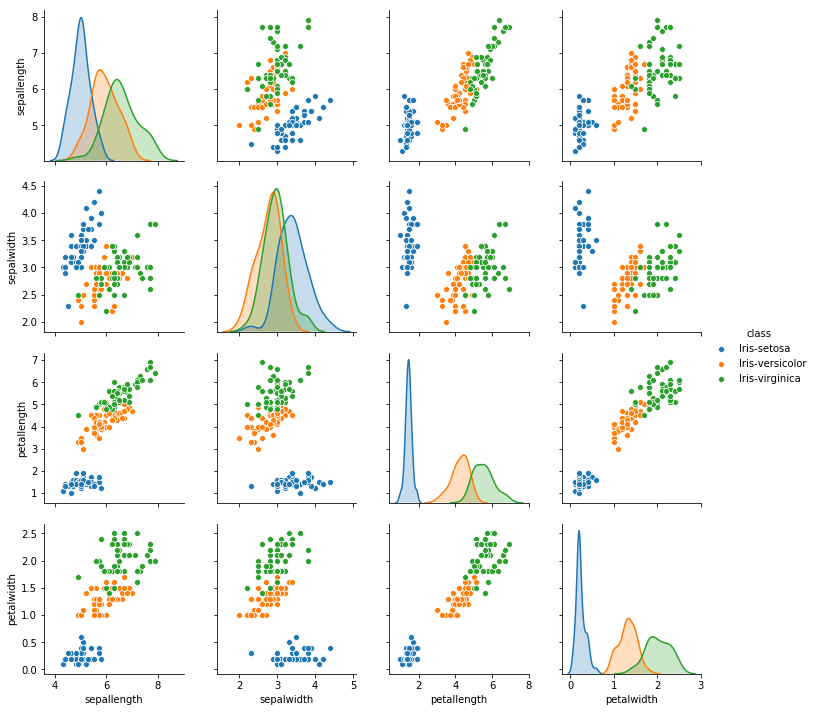

In [15]:
sns.pairplot(iris, hue='class', markers='o')
plt.show()

E analisando o grafico, percebe-se que os atributos 'petallength' e 'petalwidth' representam melhor as amostras ao separar de forma mais precisa as espécies de Iris

### Weather plot
Este conjunto tem apenas dois atributos numéricos então teremos que analisar os demais usando outras ferramentas gráficas

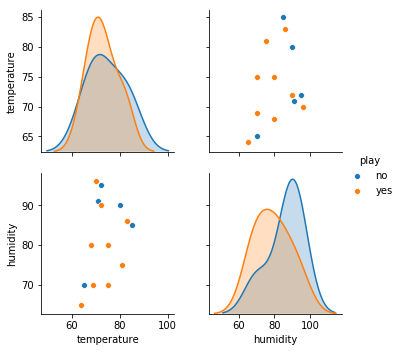

In [16]:
sns.pairplot(weather.drop('windy', axis=1), hue='play', markers='o')
plt.show()

Nota-se pelo plot que os atributos numéricos não separam as amostras de forma satisfatória, sendo assim necessário usar os demais atributos para aprimorar nossa abstração do conhecimento

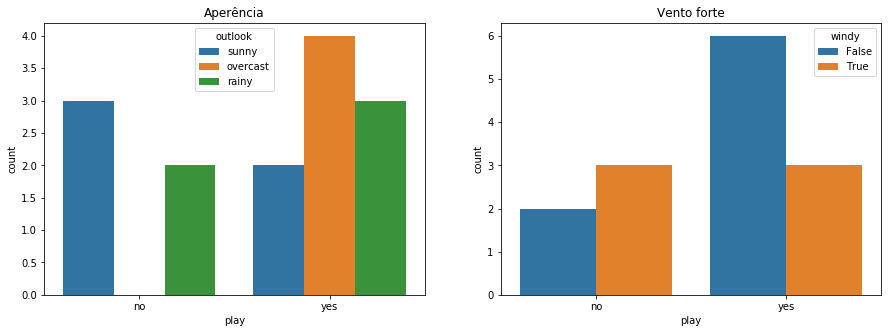

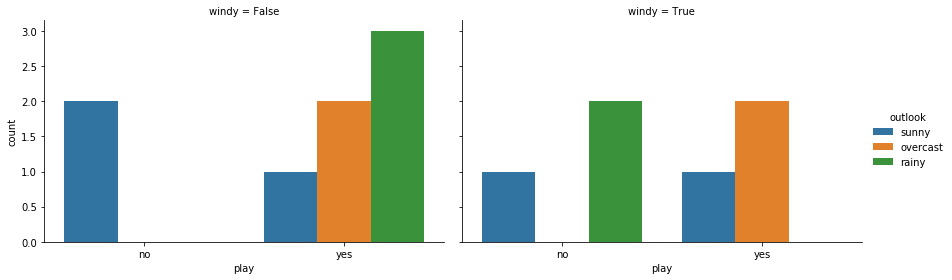

In [17]:
fig = plt.figure(figsize=(15,5))

a = fig.add_subplot(1, 2, 1)
a.set_title('Aperência')
sns.countplot(x="play", hue="outlook", data=weather)

a = fig.add_subplot(1, 2, 2)
a.set_title('Vento forte')
sns.countplot(x="play", hue="windy", data=weather)

plt.show()

sns.catplot(x="play", hue="outlook", col="windy", data=weather, kind="count", height=4, aspect=1.5)
plt.show()

Apesar da visualisação simples apresentada acima, é o suficiente para observar de forma tímida como e quanto os atributos infuenciam a classe alvo

### Contact Plot
Esse banco de dados possui apenas atributos categóricos

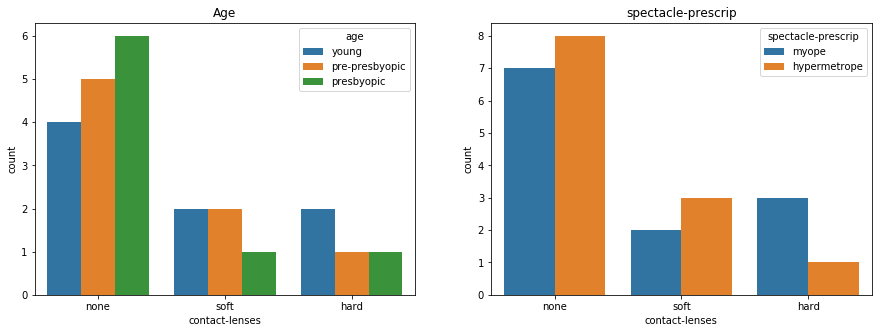

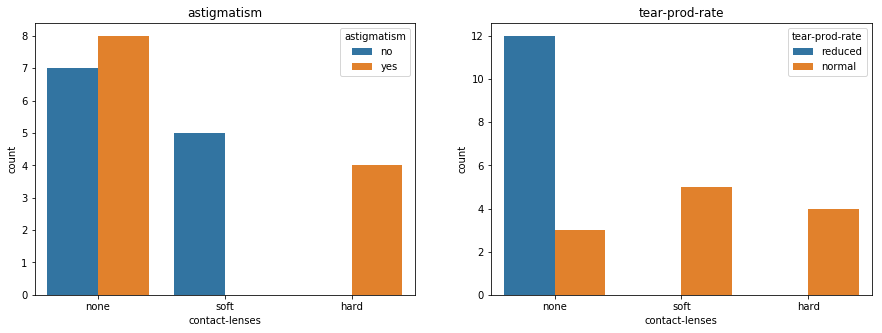

In [18]:
fig = plt.figure(figsize=(15,5))

a = fig.add_subplot(1, 2, 1)
a.set_title('Age')
sns.countplot(x="contact-lenses", hue="age", data=contact)

a = fig.add_subplot(1, 2, 2)
a.set_title('spectacle-prescrip')
sns.countplot(x="contact-lenses", hue="spectacle-prescrip", data=contact)
plt.show()

fig = plt.figure(figsize=(15,5))

a = fig.add_subplot(1, 2, 1)
a.set_title('astigmatism')
sns.countplot(x="contact-lenses", hue="astigmatism", data=contact)

a = fig.add_subplot(1, 2, 2)
a.set_title('tear-prod-rate')
sns.countplot(x="contact-lenses", hue="tear-prod-rate", data=contact)
plt.show()



## Classe para Modelos com base Gausiana

In [6]:
from sklearn.preprocessing import LabelEncoder
class GaussianBase(object):
    def __init__(self):
        self.n_feature = None
        
    def check_X_y(self, X, y=None, reset=False):
        n_samples, n_feature = X.shape
        
        if(y is not None and n_samples != len(y)):  raise Exception('Numero diferente de dados e rótulos das amotras')
        if(reset):
            self.n_feature = n_feature
            self.feature_label_encoder = [None for i in range(n_feature)]
        if(self.n_feature is None): raise Exception('Tente treinar o modelo primeiro')
        elif(self.n_feature != n_feature): raise Exception(f'Número de atributos difere do cedido anteriomente: {n_feature} ao invés de {self.n_feature}')
        
        feature_label_encoder = self.feature_label_encoder
        for i in range(n_feature):
            try:
                float(X[0,i])
            except:
                if(feature_label_encoder[i]==None):
                    feature_label_encoder[i] = LabelEncoder()
                    feature_label_encoder[i].fit(X[:, i])
                X[:, i] = feature_label_encoder[i].transform(X[:,i])
                
        self.n_samples = n_samples
        self.n_feature = n_feature
        self.feature_label_encoder = feature_label_encoder
                
        return X,y

##  Modelo probabilístico Naive Bayes<a name="modelo-probabilístico-naive-bayes"></a>

O Naive Bayes é um classificador probabilístico simples baseado no teorema de Bayes. O teorema de Bayes descreve a probabilidade de um evento, com base no conhecimento prévio de condições que podem estar relacionadas ao evento. Por exemplo, se o alzheimer está relacionado à idade, então, usando o teorema de Bayes, a idade de uma pessoa pode ser usada para avaliar com mais precisão a probabilidade de alzheimer, comparada com a avaliação da probabilidade sem conhecimento da idade da pessoa.

O teorema de Bayes é declarado matematicamente como a seguinte equação:

$$
    P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}
$$

onde $A$ e $B$ são eventos e $P(B)\neq 0$.
- $P(A\mid B)$  é uma probabilidade condicional: a probabilidade do evento $A$ ocorrer dado que $B$ é verdadeiro.
- $P(B\mid A)$ também é uma probabilidade condicional: a probabilidade de evento $B$ ocorrer dado que $A$ é verdadeiro.
- $P(A)$ e $P(B)$ são as probabilidades de observar $A$ e $B$ independentemente uns dos outros; isso é conhecido como a probabilidade marginal.

Este indutor é chamado de ingênuo pois assume que todos os atributos são independentes entre si:

$$
    f_{nb}(X) = argmax_{c_{j} \in \Omega} = \begin{Bmatrix} p(c_{j})\prod_{i=1}^{M}p(x_{i}\mid c_{j})\end{Bmatrix}
$$

Os parâmetros do modelo são simplesmente as probabilidades posteriores $p(x_{i}\mid c_{j})$ e as
probabilidades a priori $p(c_{j})$, onde $c$ são a classes do conjunto. 

A diferença entre as diversas variações do Naive Bayes é como o modelo interpreta as probabilidades.

### Gaussian Naive Bayes

Neste Naive Bayes, assume-se que as probabilidade dos dados são uma distribuição Gaussiana, o que é ótimo para dados contínuos:

$$
    P(x_i \mid c) = \frac{1}{\sqrt{2\pi\sigma^2_c}} \exp\left(-\frac{(x_i - \mu_c)^2}{2\sigma^2_c}\right)
$$

Os parametros $\sigma_c$ e $\mu_c$, neste contexto, são consecutivamente o desvio padrão e a média dos atributos das amostras separadas por classe. 

Escolhemos esta variação pois transformar os atributos nominais categóricos em numérios contínuos tem baixo custo, assim trabalhamos com ambos os tipos sem muita dificuldade.

A partir deste ponto, seguimos os dois passos abaixo:
- Treinamento: calcular e armazenar os valores de probabilidades
- Classificação de um novo exemplo: calcular as probabilidades para os atributos e classes relevante e escolher o argumento (classe) que maximiza a probabilidade posterior

In [27]:
import math

class NaiveBayes(GaussianBase):
    
    def __init__(self):
        super().__init__()
    
    def calculate_probability(self, x, mean, stdev):
        return (1 / (math.sqrt(2*math.pi) * stdev)) * math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    
    def calculate_class_probabilities(self, sample):
        probabilities = {}
        for class_value, class_summaries in self.summaries.items():
            probabilities[class_value] = 1
            for i in range(self.n_feature):
                mean, stdev = class_summaries[i]
                x = sample[i]
                probabilities[class_value] *= self.calculate_probability(x, mean, stdev)
        return probabilities
    
    def separate_by_class(self, X, y):
        return { c : X[y==c] for c in np.unique(y) }
    
    def summarize(self, instances):
        return [ (np.mean(instances[:,i]), np.std(instances[:,i])) for i in range(self.n_feature)]
        
    def fit(self, X, y):
        
        X,y = self.check_X_y(X,y, reset=True)
        separated = self.separate_by_class(X, y)
        
        summaries = {}
        for classValue, instances in separated.items():
            summaries[classValue] = self.summarize(instances)
            
        self.summaries = summaries
    
    def _predict(self, sample):
        probabilities = self.calculate_class_probabilities(sample)
        best_label, best_prob = None, -1
        for class_value, probability in probabilities.items():
            if best_label is None or probability > best_prob:
                best_prob = probability
                best_label = class_value
        return best_label
    
    def predict(self, X):
        X,_ = self.check_X_y(X)
        return [ self._predict(sample) for sample in X]

## Árvores de decisão <a name="árvores-de-decisão"></a>

Árvores de decisão são métodos de aprendizado de máquinas supervisionado não-paramétricos, muito utilizados em tarefas de classificação e regressão.

Mas de modo geral, são estruturas de dados formadas por um conjunto de elementos chamados nós, nele são guardado informaões. Além disso, toda árvore possui um nó chamado raiz, que seria o ponto de partida e ligações para outros elementos, denominados nós filhos. Esses filhos podem possuir seus próprios filhos e assim por diante. O nó que não possui filho é conhecido como nó folha. Dessa forma, uma árvore de decisão armazena regras em seus nós, e os nós folhas representam a decisão a ser tomada.

Um exemplo de árvore de decisão para o conjunto Weather seria como abaixo:
<div style="text-align:center">
    <img style="width:40%;
                height: auto"
         src="./decision_tree.png" />
</div>


## Regras <a name="regras"></a>

incluir uma descrição bacana depois

esse modelo só funciona para atributos categóricos

In [20]:
class Rules(object):
    def __init__(self):
        self.rules = None
        
    #Transformando a base de dados numa lista dde dicionários para facilitar o treino
    def data_to_dicts(self, data):  
        D = []
        col = list(data.columns)
        for tp in data.values:
            d = {}
            for i in range(len(col)):
                d[col[i]] = tp[i]
            D.append(d)
        return D
    
    #Aplicando a regra na base de dados para descobrir quais tuplas são cobertas
    def apply_rule(self, data, R):
        coverage = data[:]
        for r in R:
            coverage = [i for i in coverage if i[r[0]] == r[1]]
        return coverage
    
    #Testando a precisão da regra
    def rule_accuracy(self, coverage, atr, cls):
        accuracy = [i for i in coverage if i[atr] == cls]
        return float(len(accuracy))/len(coverage), len(accuracy)
    
    #Escolhendo a melhor regra dentro de uma lista
    def get_best_rule(self, rules):
        rule = []
        best = []
        max_acc = 0
        max_cov = 0
        for r in rules:
            if r[2] > max_acc:
                max_acc = r[2]
                max_cov = r[3]
                best.append(r)
                
            elif r[2] == max_acc:
                if r[3] > max_cov:
                    best.append(r)
                    
        rule.append(best[-1])
        return rule
    
    #Construindo regras
    def build(self, instances, atrs, atr, cls):
        R = [] #Lista de regras
        accuracy = -1 #Precisão das regras geradas
        rule_instances = instances[::]  #Instâncias do anco de dados                             
        avail_attr = [a for a in atrs if a != atr] #Atributos a serem avaliados
        
        while True:
            all_rules = []
            #Para cada atributo ainda não utilizado:
            for A in [a for a in avail_attr if a not in [r[0] for r in R]]:
                #Para cada valor único deste atributo:
                for X in list(set([a[A] for a in rule_instances])):
                    
                    coverage = self.apply_rule(rule_instances, [[A, X]]) #Aplicar instância
                    accuracy = self.rule_accuracy(coverage, atr, cls) #Testar a precisão
                    all_rules.append([A, X, accuracy[0], accuracy[1]]) #Guardar regra
                    
            best = self.get_best_rule(all_rules) #Escolher a melhor regra gerada
            
            R.append((best[0][0], best[0][1])) #Guardar a melhor regra
            
            rule_instances = self.apply_rule(rule_instances, R) #Trocar as instâncias para melhorar a regra
            
            #Se a precisão chegar a 100% ou a regra cobrir menos de uma instância
            if best[0][2] == 1.0 or best[0][3] < 1: 
                break
            
        return R, rule_instances
        
    #Treinar o modelo
    def train(self, data, atribute=None):
        if not atribute: #Se nenhum atributo foi especificado, escolher o último
            atribute = data.columns[-1]
            
        self.atribute = atribute #Guardado o atributo de treinamento
        dicts = self.data_to_dicts(data) #Gerando dicionários
        atributes = list(data.columns) #Listando os atributos
        self.order = atributes #Guardando a lista dos atributos para fazer predições
        classes = list(set(data[atribute])) #Listando as classes
        self.rules = [] #Lista de regras
        
        #Escolhendo um atributo padão
        m = 0
        self.default = None
        for cls in classes:
            aux = len([i for i in list(data[atribute]) if i == cls])
            if aux > m:
                m = aux
                self.default = cls
        #Caso um exemplo não se enquadre em nenhuma regra, será classificado como parte da classe com mais exemplos
        
        #Para cada classe:
        for cls in classes:
            instances = dicts[::] 
            #Enquanto exestirem instâncias desta classe:
            while len([i for i in instances if i[atribute] == cls]) > 0:
                rule, covered = self.build(instances, atributes, atribute, cls) #Construir regra
                self.rules.append({cls:rule}) #Guardar regra
                instances = [i for i in instances if i not in covered] #Remover instâncias já cobertas
    
    #Escrever regras na tela
    def __str__(self):
        Rule = ""
        for rule in self.rules:
            k = list(rule.keys())[0]
            nbr = len(rule[k])        
            Rule += " if "
            for subrules in rule[k]:
                nbr -= 1
                Rule = Rule + str(subrules[0]) + " = " + subrules[1]
                if nbr > 0:
                    Rule = Rule + "\n\t and "
                else:
                    Rule = Rule + ":\n then " + self.atribute + " = " + k + "\n\n"
        
        return Rule +" else "+ self.default+"\n"
            
    #Função de predição
    def predict(self, example):
        #Para cada regra:
        for rule in self.rules:
            cls = list(rule.keys())[0] #classe da regra
            flag = True #O exemplo pertence à classe cls
            #Para cada subregra:
            for subrules in rule[cls]:
                #Se o exemplo não obedece ela:
                if example[self.order.index(subrules[0])] != subrules[1]:
                    flag = False #O exemplo não pertence à cls
            #Se o exemplo pertence a cls:
            if flag:
                return cls
        
        #Caso um exemplo não se enquadre em nenhuma regra, será classificado como parte da classe com mais exemplos
        return self.default
                

In [21]:
r = Rules() #intanciar o modelo
r.train(contact) #treinar o modelo
print(r)

 if astigmatism = yes
	 and tear-prod-rate = normal
	 and spectacle-prescrip = myope:
 then contact-lenses = hard

 if age = young
	 and astigmatism = yes
	 and tear-prod-rate = normal:
 then contact-lenses = hard

 if astigmatism = no
	 and tear-prod-rate = normal
	 and spectacle-prescrip = hypermetrope:
 then contact-lenses = soft

 if astigmatism = no
	 and tear-prod-rate = normal
	 and age = pre-presbyopic:
 then contact-lenses = soft

 if age = young
	 and astigmatism = no
	 and tear-prod-rate = normal:
 then contact-lenses = soft

 if tear-prod-rate = reduced:
 then contact-lenses = none

 if age = presbyopic
	 and tear-prod-rate = normal
	 and spectacle-prescrip = myope
	 and astigmatism = no:
 then contact-lenses = none

 if astigmatism = yes
	 and spectacle-prescrip = hypermetrope
	 and age = pre-presbyopic:
 then contact-lenses = none

 if age = presbyopic
	 and spectacle-prescrip = hypermetrope
	 and astigmatism = yes:
 then contact-lenses = none

 else none



In [22]:
s = ['young','myope','no','normal','?']
print(r.predict(s))

soft


### K-NN 

Acrescentar uma descrição top

In [137]:
class NN(object):
    
    def __init__(self):
        self.points = []
        self.atribute = None
        self.cat = {}
        self.classes=[]
        self.pos = -1
    
    def clean_cat(self,point):
        l = list(point.values())[0]
        for atr in range(len(l)):
            try:
                l[atr] = float(l[atr])
            except ValueError:
                l[atr] = self.cat[self.order[atr]][l[atr]]
        point[list(point.keys())[0]] = l
        #return
    
    def to_number(self, data, points):
        atribs = list(data.columns)
        count = []
        atrs = []
        for point in range(len(points)):
            k = list(points[point].keys())[0]
            for e in range(len(points[point][k])):
                try:
                    a = int(points[point][k][e])
                except:
                    if e not in atrs:
                        atrs.append(e)
                        count.append(0)
                        self.cat[atribs[e]] = {}
                    
                    if points[point][k][e] not in list(self.cat[atribs[e]].keys()):
                        self.cat[atribs[e]][points[point][k][e]] = count[atrs.index(e)]
                        count[atrs.index(e)]+=1
                        
                    points[point][k][e] = self.cat[atribs[e]][points[point][k][e]]
        return points
                
    def to_points(self, data):
        pos =list(data.columns).index(self.atribute)
        have_cat = False
        points = []
        for tp in data.values:
            D = {tp[pos]:[]}
            for e in range(len(tp)):
                if e != pos:
                    try:
                        D[tp[pos]].append(float(tp[e]))
                    except:
                        D[tp[pos]].append(tp[e])
                        have_cat = True
            
            points.append(D)
        
        if have_cat:
            points = self.to_number(data, points)
        return points
    
    def euclideana(self, v1, v2):
        return sum([(i-j)**2 for i,j in zip(v1,v2)])**(0.5)
    
    def manhattan(self, v1, v2):
        return sum([abs(i-j) for i,j in zip(v1,v2)])
    
    def chebyshev(self, v1, v2):
        return max([abs(i-j) for i,j in zip(v1,v2)])
    
    def train(self, data, k=3, atribute=None, dist='euclideana'):
        if not atribute:
            atribute = list(data.columns)[-1]
            self.pos = list(data.columns).index(atribute)
        else:
            try:
                self.pos = list(data.columns).index(atribute)
            except:
                raise Exception("Atributo não encontrado")
        self.atribute = atribute #Guardado o atributo de treinamento
        self.classes = list(set(data[atribute]))
        self.order = [i for i in list(data.columns) if i != atribute]
        self.points = self.to_points(data)
        
        if k > 0:
            self.k = k
        else:
            raise Exception("Número negativo de vizinhos")
        
        if dist == 'euclideana':
            self.dist = self.euclideana
        elif dist == 'manhattan':
            self.dist = self.manhattan
        elif dist == "chebyshev":
            self.dist = self.chebyshev
        else:
            raise Exception("Distância inválida")

    
    def fat(i):
        fat = 1
        while i > 1:
            fat *= 1
        return fat
    
    def predict(self, example):
        point = {'unknow':[example[i] for i in range(len(example)) if i != self.pos]}
        self.clean_cat(point)
        v = []
        d = []
        jose = []
        all_dists =[]
        for pt in self.points:
            d = self.dist(list(pt.values())[0], list(point.values())[0])
            all_dists.append(d)
        
        for p in range(len(all_dists)):
            jose.append({list(self.points[p].keys())[0]:all_dists[p]})
        
        jose.sort(key=lambda x: list(x.values())[0])
        
        v = jose[:self.k:]
        
        
        cls = [0 for i in range(len(self.classes))]
        
        for i in v:
            cls[self.classes.index(list(i.keys())[0])] +=1
        return self.classes[cls.index(max(cls))]  
        
        

In [138]:
knn = NN()
knn.train(contact, 5)
ex = ['young','myope','no','normal','?']
knn.predict(ex)

'soft'

## KNN (Sergio)

In [20]:
import numpy as np
from operator import itemgetter
from collections import Counter

class KnnClassifier(GaussianBase):
    def __init__(self, n_neighbors=5, distance="euclideana"):
        super().__init__()
        distances = {"euclideana":self.__euclideana, "manhattan":self.__manhattan, "chebyshev":self.__chebyshev}    
        
        self.n_neighbors = n_neighbors
        self.__distance = distances[distance]
        self.__distances = distances
    
    def __euclideana(self, x, y):
        return sum((x - y)**2)**0.5
    
    def __manhattan(self, x, y):
        return sum(abs(x - y))
    
    def __chebyshev(self, x, y):
        return max(abs(x - y))
    
    def fit(self, X, y):
        X,y = self.check_X_y(X,y, reset=True)
        self.X, self.y = X,y
    
    def _predict(self, sample):
        neighbors_distances = list(map(lambda X,y: (self.__distance(sample,X),y), self.X, self.y))
        neighbors_distances.sort(key=itemgetter(0))
        neighbors_distances.append((np.Inf,-1))
        
        k_neighbors = []
        for i in range(len(neighbors_distances)):
            k_neighbors.append(neighbors_distances[i][1])
            if len(k_neighbors) >= self.n_neighbors and neighbors_distances[i][0] != neighbors_distances[i+1][0]:
                break
        
        mode_neighbors_end = Counter(k_neighbors[(self.n_neighbors-1):]).most_common(1)[0][0]
        mode_neighbors = Counter(k_neighbors[:(self.n_neighbors-1)] + [mode_neighbors_end]).most_common(1)[0][0]
        
        return mode_neighbors

    def predict(self, X):
        X,_ = self.check_X_y(X)
        return [ self._predict(sample) for sample in X]
    